In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dsgbb.csv')

In [3]:
import pandas as pd

# assume df is your dataset created from the previous code snippet

# Print the minimum, maximum, and mean values for each column
for col in df.columns:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, mean={df[col].mean()}")


Price: min=5200, max=169900, mean=56175.71834992887
Shaft_Diameter: min=19, max=120, mean=61.50071123755334
Rated_torque: min=70.0, max=37177.0, mean=6957.564864864864
Max_Torque_Rating: min=100, max=40000, mean=9703.79800853485
Thermal_Rating: min=0.75, max=95.0, mean=11.956685633001424
Stages: min=1, max=5, mean=3.2432432432432434
Acutal_Ratio: min=3.1, max=10387.0, mean=1270.2864580369842
Max_Input_Power: min=0.01, max=368.0, mean=12.24425320056899
Actual_Speed_Rpm: min=0.14, max=1197.0, mean=50.55641536273116


In [3]:
df

,Price,Shaft_Diameter,Rated_torque,Max_Torque_Rating,Thermal_Rating,Stages,Acutal_Ratio,Max_Input_Power,Actual_Speed_Rpm
0,5200,19,70.0,100,0.75,1,3.4,0.75,424.00
1,6100,19,80.0,100,0.75,1,4.0,0.75,360.00
2,6800,19,70.0,100,0.75,1,5.0,0.75,288.00
3,7400,19,80.0,100,0.75,2,11.6,0.75,125.00
4,7600,19,70.0,100,0.75,2,13.6,0.75,106.00
...,...,...,...,...,...,...,...,...,...
698,164200,120,32049.0,40000,18.50,5,6004.5,1.08,0.24
699,165700,120,30767.0,40000,18.50,5,6947.6,0.90,0.21
700,167200,120,32049.0,40000,18.50,5,7976.3,0.81,0.18
701,168700,120,30767.0,40000,18.50,5,9180.1,0.68,0.16


# Data Cleaning

In [4]:
df.describe()

,Price,Shaft_Diameter,Rated_torque,Max_Torque_Rating,Thermal_Rating,Stages,Acutal_Ratio,Max_Input_Power,Actual_Speed_Rpm
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,56175.718350,61.500711,6957.564865,9703.798009,11.956686,3.243243,1270.286458,12.244253,50.556415
std,40754.382398,32.935830,8706.680857,12130.531925,16.336398,1.233094,2265.059000,25.009352,105.479132
min,5200.000000,19.000000,70.000000,100.000000,0.750000,1.000000,3.100000,0.010000,0.140000
25%,22300.000000,32.000000,783.000000,1000.000000,1.500000,2.000000,35.100000,0.390000,1.170000
50%,44700.000000,60.000000,2456.000000,5000.000000,5.500000,3.000000,202.500000,2.100000,7.110000
75%,82025.000000,95.000000,10903.500000,20000.000000,18.500000,4.000000,1232.000000,10.455000,41.030000
max,169900.000000,120.000000,37177.000000,40000.000000,95.000000,5.000000,10387.000000,368.000000,1197.000000


In [5]:
duplicate_rows = df.duplicated().sum()

In [6]:
print(duplicate_rows)

0


In [7]:
missing_values = df.isnull().sum()

In [8]:
print(missing_values)

Price                0
Shaft_Diameter       0
Rated_torque         0
Max_Torque_Rating    0
Thermal_Rating       0
Stages               0
Acutal_Ratio         0
Max_Input_Power      0
Actual_Speed_Rpm     0
dtype: int64


# Data Visualization

<Axes: xlabel='Shaft_Diameter', ylabel='Price'>

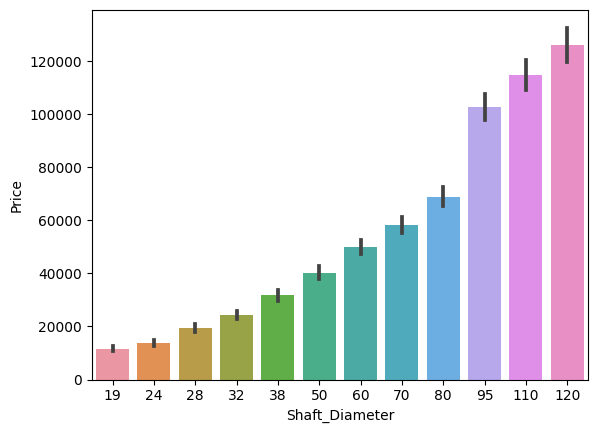

In [9]:
sns.barplot(x = df['Shaft_Diameter'], y = df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

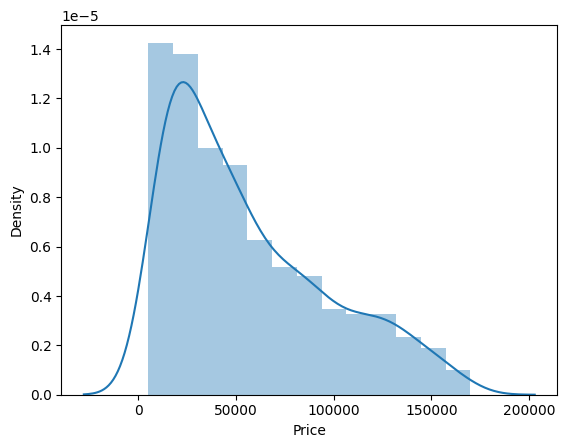

In [10]:
sns.distplot(df['Price'])

<Axes: >

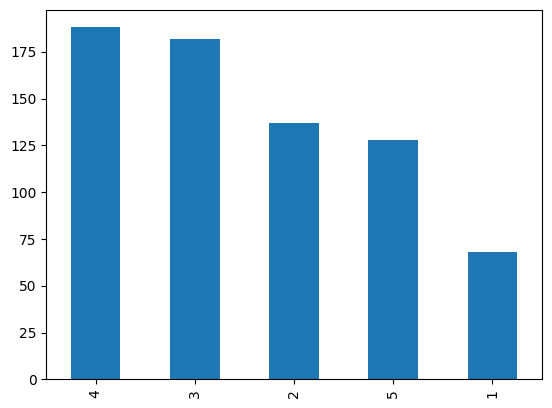

In [11]:
df['Stages'].value_counts().plot(kind='bar')

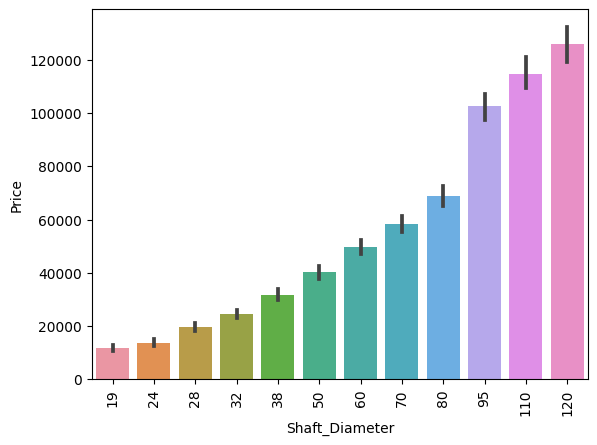

In [12]:
sns.barplot(x=df['Shaft_Diameter'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Thermal_Rating', ylabel='Price'>

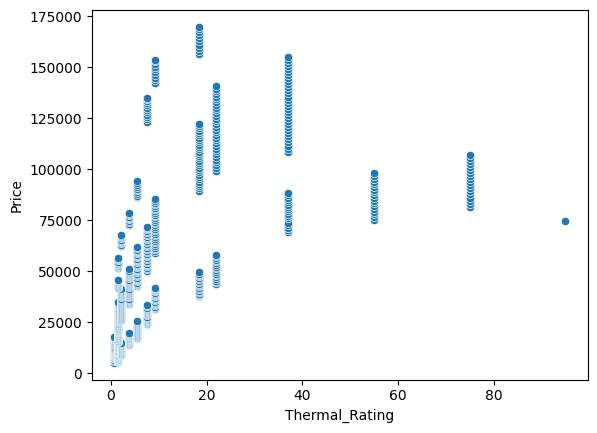

In [13]:
sns.scatterplot(data=df, x="Thermal_Rating", y="Price")

<Axes: >

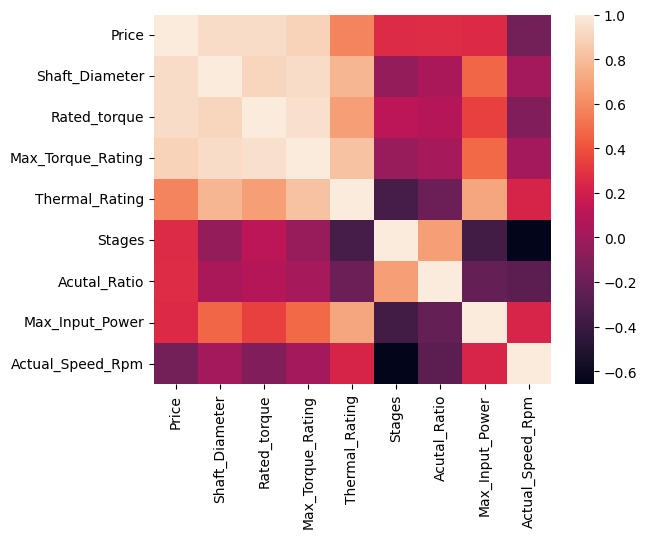

In [14]:
sns.heatmap(df.corr())

In [15]:
X = df.drop(columns=['Price'])
y = df['Price']

# Data Splitting

In [16]:
X

,Shaft_Diameter,Rated_torque,Max_Torque_Rating,Thermal_Rating,Stages,Acutal_Ratio,Max_Input_Power,Actual_Speed_Rpm
0,19,70.0,100,0.75,1,3.4,0.75,424.00
1,19,80.0,100,0.75,1,4.0,0.75,360.00
2,19,70.0,100,0.75,1,5.0,0.75,288.00
3,19,80.0,100,0.75,2,11.6,0.75,125.00
4,19,70.0,100,0.75,2,13.6,0.75,106.00
...,...,...,...,...,...,...,...,...
698,120,32049.0,40000,18.50,5,6004.5,1.08,0.24
699,120,30767.0,40000,18.50,5,6947.6,0.90,0.21
700,120,32049.0,40000,18.50,5,7976.3,0.81,0.18
701,120,30767.0,40000,18.50,5,9180.1,0.68,0.16


In [17]:
y

0        5200
1        6100
2        6800
3        7400
4        7600
        ...  
698    164200
699    165700
700    167200
701    168700
702    169900
Name: Price, Length: 703, dtype: int64

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Fitting the Algorithms

In [19]:
Lin=LinearRegression() 
Log=LogisticRegression() 
Las=Lasso() 
Rid=Ridge() 
Eln=ElasticNet()

In [20]:
Lin.fit(X_train,y_train)

LinearRegression()

In [21]:
Log.fit(X_train,y_train)

LogisticRegression()

In [22]:
Las.fit(X_train,y_train)

Lasso()

In [23]:
Rid.fit(X_train,y_train)

Ridge()

In [24]:
Eln.fit(X_train,y_train)

ElasticNet()

In [25]:
y_pred_Lin=Lin.predict(X_test)

In [26]:
y_pred_Log=Log.predict(X_test)

In [27]:
y_pred_Las=Las.predict(X_test)

In [28]:
y_pred_Rid=Rid.predict(X_test)

In [29]:
y_pred_Eln=Eln.predict(X_test)

# User Input Prediction

In [30]:
Lin.predict(pd.DataFrame([[120,32049.0,40000,18.50,5,6004.5,1.080,0.24]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Stages','Acutal_Ratio','Max_Input_Power','Actual_Speed_Rpm']))

array([164507.62104217])

In [31]:
Log.predict(pd.DataFrame([[120,32049.0,40000,18.50,5,6004.5,1.080,0.24]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Stages','Acutal_Ratio','Max_Input_Power','Actual_Speed_Rpm']))

array([140960], dtype=int64)

In [32]:
Las.predict(pd.DataFrame([[120,32049.0,40000,18.50,5,6004.5,1.080,0.24]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Stages','Acutal_Ratio','Max_Input_Power','Actual_Speed_Rpm']))

array([164509.00257598])

In [33]:
Rid.predict(pd.DataFrame([[120,32049.0,40000,18.50,5,6004.5,1.080,0.24]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Stages','Acutal_Ratio','Max_Input_Power','Actual_Speed_Rpm']))

array([164520.1028592])

In [34]:
Eln.predict(pd.DataFrame([[120,32049.0,40000,18.50,5,6004.5,1.080,0.24]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Stages','Acutal_Ratio','Max_Input_Power','Actual_Speed_Rpm']))

array([166055.44956991])

# Model Evalutaion

In [35]:
print('R2 score',r2_score(y_test,y_pred_Lin))
r2 = r2_score(y_test, y_pred_Lin)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Lin))
print('Mean squared error',mean_squared_error(y_test,y_pred_Lin))
mse = mean_squared_error(y_test, y_pred_Lin)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

R2 score 0.9473872381455284
Adjusted R-squared: 0.9441985859119241
Mean absolute error 3912.08960919201
Mean squared error 85655741.39481246
Root Mean squared error: 9255.038703042384


In [36]:
print('accuracy_score',accuracy_score(y_test, y_pred_Log))
print('precision_score',precision_score(y_test, y_pred_Log, average='micro'))
print('recall_score',recall_score(y_test, y_pred_Log, average='micro'))
print('f1_score',f1_score(y_test, y_pred_Log, average='micro')) 

accuracy_score 0.0
precision_score 0.0
recall_score 0.0
f1_score 0.0


In [37]:
print('R2 score',r2_score(y_test,y_pred_Las))
r2 = r2_score(y_test, y_pred_Las)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Las))
print('Mean squared error',mean_squared_error(y_test,y_pred_Las))
mse = mean_squared_error(y_test, y_pred_Las)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

R2 score 0.94737984213016
Adjusted R-squared: 0.9441907416532
Mean absolute error 3911.9505229325023
Mean squared error 85667782.41218954
Root Mean squared error: 9255.689191637191


In [38]:
print('R2 score',r2_score(y_test,y_pred_Rid))
r2 = r2_score(y_test, y_pred_Rid)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Rid))
print('Mean squared error',mean_squared_error(y_test,y_pred_Rid))
mse = mean_squared_error(y_test, y_pred_Rid)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

R2 score 0.94733553948746
Adjusted R-squared: 0.9441437540018515
Mean absolute error 3910.9252583687216
Mean squared error 85739908.93762681
Root Mean squared error: 9259.584706542017


In [39]:
print('R2 score',r2_score(y_test,y_pred_Eln))
r2 = r2_score(y_test, y_pred_Eln)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Eln))
print('Mean squared error',mean_squared_error(y_test,y_pred_Eln))
mse = mean_squared_error(y_test, y_pred_Eln)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

R2 score 0.9392047668948251
Adjusted R-squared: 0.9355202073126934
Mean absolute error 3943.1597079616286
Mean squared error 98977141.31218173
Root Mean squared error: 9948.725612468248


# GUI

In [425]:
Lin=LinearRegression()
Lin_final = Lin.fit(X_train,y_train)
import joblib
joblib.dump(Lin_final,'GearBox_price_predictor')
['GearBox_price_predictor']
model = joblib.load('GearBox_price_predictor')
from tkinter import *
import joblib


def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    
    model = joblib.load('GearBox_price_predictor')
    data_new = pd.DataFrame({
    'Shaft_Diameter':p1,
    'Rated_torque':p2,
    'Max_Torque_Rating':p3,
    'Thermal_Rating':p4,
    'Stages':p5,
    'Acutal_Ratio':p6,
    'Max_Input_Power':p7,
    'Actual_Speed_Rpm':p8
    
},index=[0])
    result=model.predict(data_new)
    Label(master, text="GearBox Purchase amount").grid(row=9)
    Label(master, text=result).grid(row=11)
    print("GearBox Purchase amount", result[0])
    
master = Tk()
master.title("GearBox Price Prediction")
label = Label(master, text = "GearBox Price Prediction"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Shaft_Diameter").grid(row=1)
Label(master, text="Rated_torque").grid(row=2)
Label(master, text="Max_Torque_Rating").grid(row=3)
Label(master, text="Thermal_Rating").grid(row=4)
Label(master, text="Stages").grid(row=5)
Label(master, text="Acutal_Ratio").grid(row=6)
Label(master, text="Max_Input_Power").grid(row=7)
Label(master, text="Actual_Speed_Rpm").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()